### Module Import

In [29]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.stats import norm
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


# **Let's EDA**

In this cell, the vending machine sales data is loaded and cleaned. <br> Charts are created to visualize sales performance and quantity sold performance by location and category. <br>These visualizations provide insights into the best-performing locations and categories.

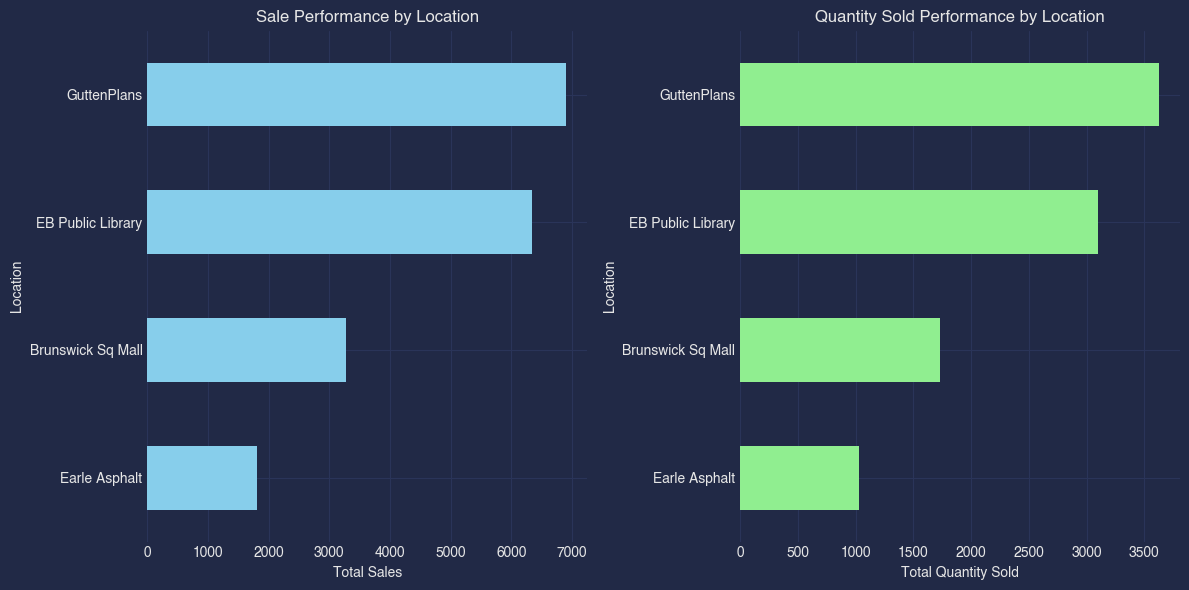

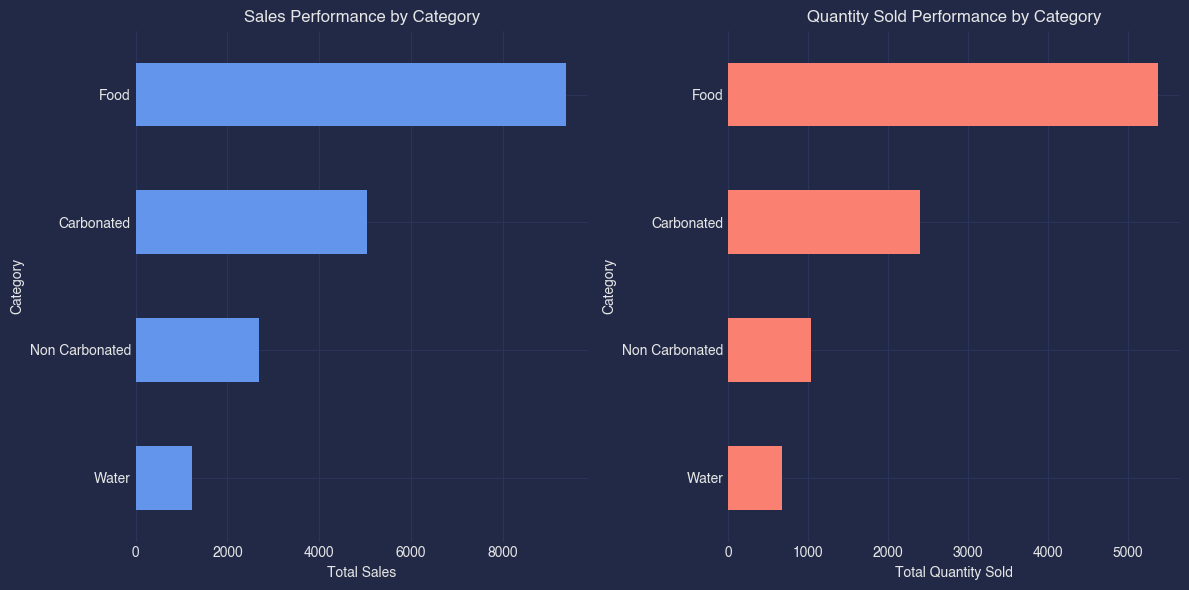

In [5]:
# Load and clean data
data = pd.read_csv('vending_machine_sales.csv')
data.dropna(subset=['Category'], inplace=True)
data = data.drop(columns=['Status', 'Device ID', 'Machine'])

# Grouping data by Location and Category for sales and quantity
sales_by_location = data.groupby('Location')['LineTotal'].sum().sort_values()
qty_sold_by_location = data.groupby('Location')['RQty'].sum().sort_values()
sales_by_category = data.groupby('Category')['LineTotal'].sum().sort_values()
qty_sold_by_category = data.groupby('Category')['RQty'].sum().sort_values()

# Plotting sales and quantity by location horizontally
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sales_by_location.plot(kind='barh', color='skyblue', ax=axs[0])
axs[0].set_title('Sale Performance by Location')
axs[0].set_xlabel('Total Sales')
axs[0].set_ylabel('Location')

qty_sold_by_location.plot(kind='barh', color='lightgreen', ax=axs[1])
axs[1].set_title('Quantity Sold Performance by Location')
axs[1].set_xlabel('Total Quantity Sold')
axs[1].set_ylabel('Location')

plt.tight_layout()
plt.show()

# Plotting sales and quantity by category horizontally
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sales_by_category.plot(kind='barh', color='cornflowerblue', ax=axs[0])
axs[0].set_title('Sales Performance by Category')
axs[0].set_xlabel('Total Sales')
axs[0].set_ylabel('Category')

qty_sold_by_category.plot(kind='barh', color='salmon', ax=axs[1])
axs[1].set_title('Quantity Sold Performance by Category')
axs[1].set_xlabel('Total Quantity Sold')
axs[1].set_ylabel('Category')

plt.tight_layout()
plt.show()

#### Insights from Vending Machine Sales Data

#### Sales Performance by Location
- **GuttenPlans:** Highest sales and quantity sold. 📈🏆
- **EB Public Library:** Second highest in both metrics. 📊
- **Brunswick Sq Mall** and **Earle Asphalt:** Lower sales and quantities. 📉

#### Sales Performance by Category
- **Food:** Highest sales and quantity sold. 🍔🏅
- **Carbonated Drinks:** Second highest in both metrics. 🥤
- **Non-Carbonated Drinks** and **Water:** Lower sales and quantities. 🚰


## Monthly Quantity Sold by Location and Category

In [9]:
data.head()

,Location,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date,YearMonth
0,Brunswick Sq Mall,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,2022-01-01,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022,2022-01
1,Brunswick Sq Mall,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,2022-01-01,Credit,148,3.5,1,148,3.5,1,3.5,5.0,1/1/2022,2022-01
2,Brunswick Sq Mall,Takis - Hot Chilli Pepper & Lime,Food,14516018629,2022-01-01,Credit,123,1.5,1,123,1.5,1,1.5,5.0,1/1/2022,2022-01
3,Brunswick Sq Mall,Takis - Hot Chilli Pepper & Lime,Food,14516020373,2022-01-01,Credit,123,1.5,1,123,1.5,1,1.5,1.5,1/1/2022,2022-01
4,Brunswick Sq Mall,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,2022-01-01,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022,2022-01


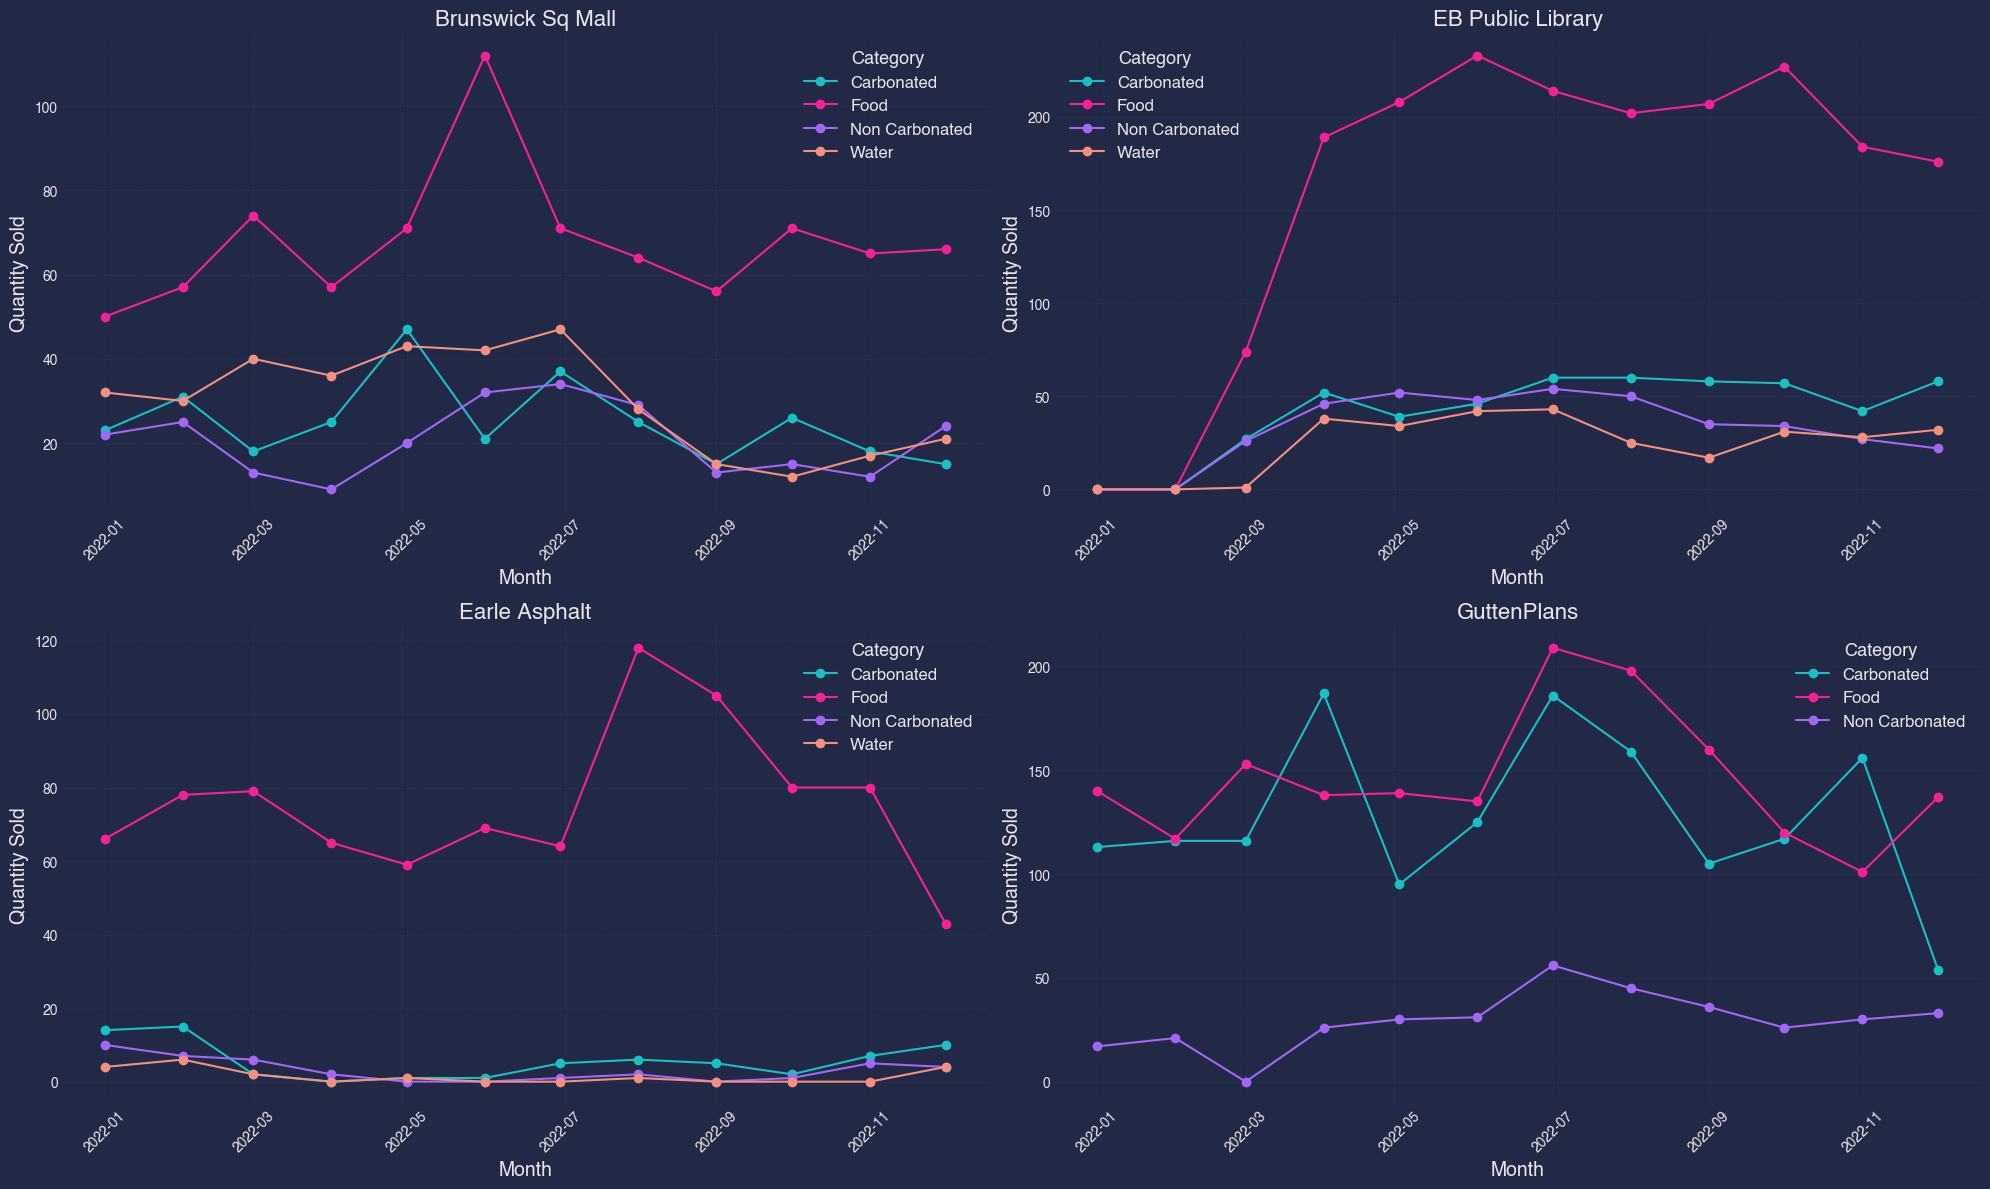

In [7]:
# Convert transaction date to datetime and create YearMonth column
data['TransDate'] = pd.to_datetime(data['TransDate'])
data['YearMonth'] = data['TransDate'].dt.to_period('M')

qty_sold_by_month_location_category = data.groupby(['Location', 'Category', 'YearMonth'])['RQty'].sum().reset_index()
pivot_qty_sold_category = qty_sold_by_month_location_category.pivot_table(index='YearMonth', columns=['Location', 'Category'], values='RQty').fillna(0)
pivot_qty_sold_category.index = pivot_qty_sold_category.index.to_timestamp()

# Plot subplots for each location
plt.figure(figsize=(20, 12))
locations = pivot_qty_sold_category.columns.levels[0]
num_locations = len(locations)
num_cols = 2
num_rows = (num_locations + num_cols - 1) // num_cols  # Calculate required number of rows

for i, location in enumerate(locations, 1):
    plt.subplot(num_rows, num_cols, i)
    for category in pivot_qty_sold_category[location].columns:
        plt.plot(pivot_qty_sold_category.index, pivot_qty_sold_category[location][category], marker='o', linestyle='-', label=category)
    plt.title(f'{location}', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Quantity Sold', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend(title='Category', fontsize=12, title_fontsize='13')

plt.tight_layout()
plt.show()


#### Fun Insights from Monthly Quantity Sold Data 📊

##### Locations and Trends

1. **Brunswick Sq Mall** 🏢:
   - Peaks in food sales around March and May.
   - Steady sales in other categories with occasional fluctuations.

2. **EB Public Library** 📚:
   - Food sales soar, especially in the middle of the year.
   - Carbonated drinks maintain a consistent trend.

3. **Earle Asphalt** 🛣️:
   - High demand for food with a noticeable spike in August.
   - Minimal sales in other categories.

4. **GuttenPlans** 🏢:
   - Varied trends with noticeable spikes in food and carbonated drinks.
   - Consistent but lower sales in non-carbonated drinks and water.

##### Overall Trends
- **Food** is a consistent favorite across all locations 🍔.
- **Carbonated Drinks** hold steady in popularity 🥤.
- **Non-Carbonated Drinks** and **Water** have lower but stable sales 🚰.

#### Fun Fact: 
Watch out for those mid-year peaks! 🌟 They might indicate special events or increased foot traffic during those times.

# Forecasting Product Sold with LSTM 🧠📈
This cell builds and trains an LSTM model to forecast sold in product. The data is preprocessed, one-hot encoded, and normalized. The model's predictions are then compared to the actual sales data, and the results are plotted. 🤖✨


/var/folders/df/fj9fp3kj3_9c8vqsxd94_clh0000gn/T/ipykernel_23874/1514962614.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.groupby([pd.Grouper(key='TransDate', freq='M'), 'Location', 'Category'])['MQty'].sum().reset_index()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


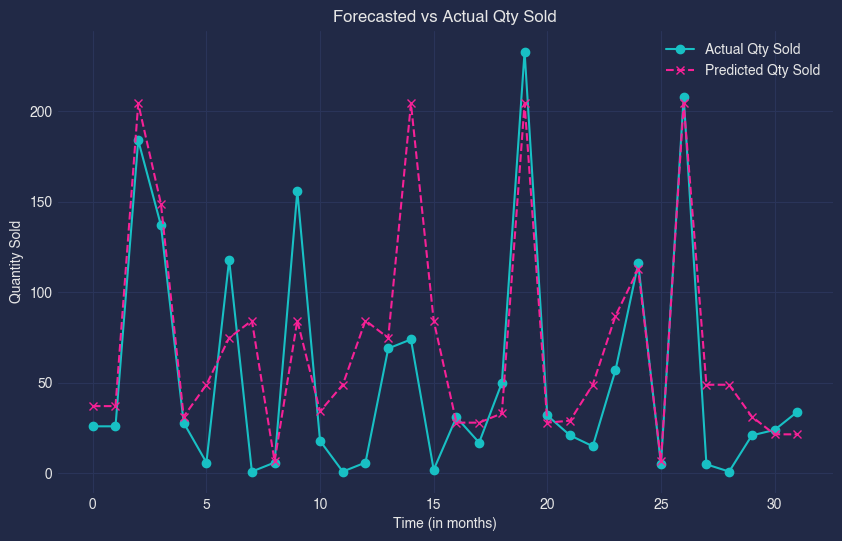

In [23]:

# Load and preprocess data
df = pd.read_csv('/Users/putanyn/Documents/MScDataScience/CRM Paper/vending_machine_sales.csv')
df['TransDate'] = pd.to_datetime(df['TransDate'])
df_monthly = df.groupby([pd.Grouper(key='TransDate', freq='M'), 'Location', 'Category'])['MQty'].sum().reset_index()

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df_monthly[['Location', 'Category']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Location', 'Category']))

df_processed = pd.concat([df_monthly[['TransDate']], encoded_df, df_monthly['MQty']], axis=1)

# Normalize the 'MQty' column
scaler = MinMaxScaler()
df_processed['MQty'] = scaler.fit_transform(df_processed[['MQty']].values)

def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data) - 1:
            break
        seq_x, seq_y = data[i:end_ix, :-1], data[end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Prepare features and target variables
features = df_processed.drop(['TransDate', 'MQty'], axis=1).values
target = df_processed['MQty'].values

n_steps = 3
X, y = create_sequences(np.hstack((features, target.reshape(-1, 1))), n_steps)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, X.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=200, validation_split=0.2, verbose=0)

# Generate predictions
predictions = model.predict(X_test)

# Reverse normalization
actuals = scaler.inverse_transform(y_test.reshape(-1, 1))
predicted = scaler.inverse_transform(predictions)

# Plot forecasted vs actual sales
plt.figure(figsize=(10, 6))
plt.plot(actuals, label='Actual Qty Sold', marker='o')
plt.plot(predicted, label='Predicted Qty Sold', linestyle='--', marker='x')
plt.title('Forecasted vs Actual Qty Sold')
plt.xlabel('Time (in months)')
plt.ylabel('Quantity Sold')
plt.legend()
plt.show()

#### Fun Insights from Forecasted vs Actual Quantity Sold 📈🔍

##### Key Observations:
- **Pattern Matching:** The predicted quantity sold (pink dashed line) closely matches the actual quantity sold (blue line), highlighting the model's effectiveness 🔴🔵.
- **Notable Peaks:** Significant peaks in sales are observed around months 2, 15, 20, and 25, indicating recurring high-demand periods 🎢.
- **Consistency:** The model captures both the spikes and dips, providing a reliable forecast of sales trends 📉📈.

##### Fun Fact:
- Our LSTM model did a fantastic job predicting sales trends! 🎉 The alignment between actual and predicted sales ensures you can plan inventory and promotions confidently.

## Forecasting Future Sales for Inventory Optimization 📅🔮
This cell forecasts the quantity of items to be sold over the next 12 months for each location and category in the vending machines. <br>This information is crucial for optimizing inventory levels and ensuring efficient stock management. 📈✨

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

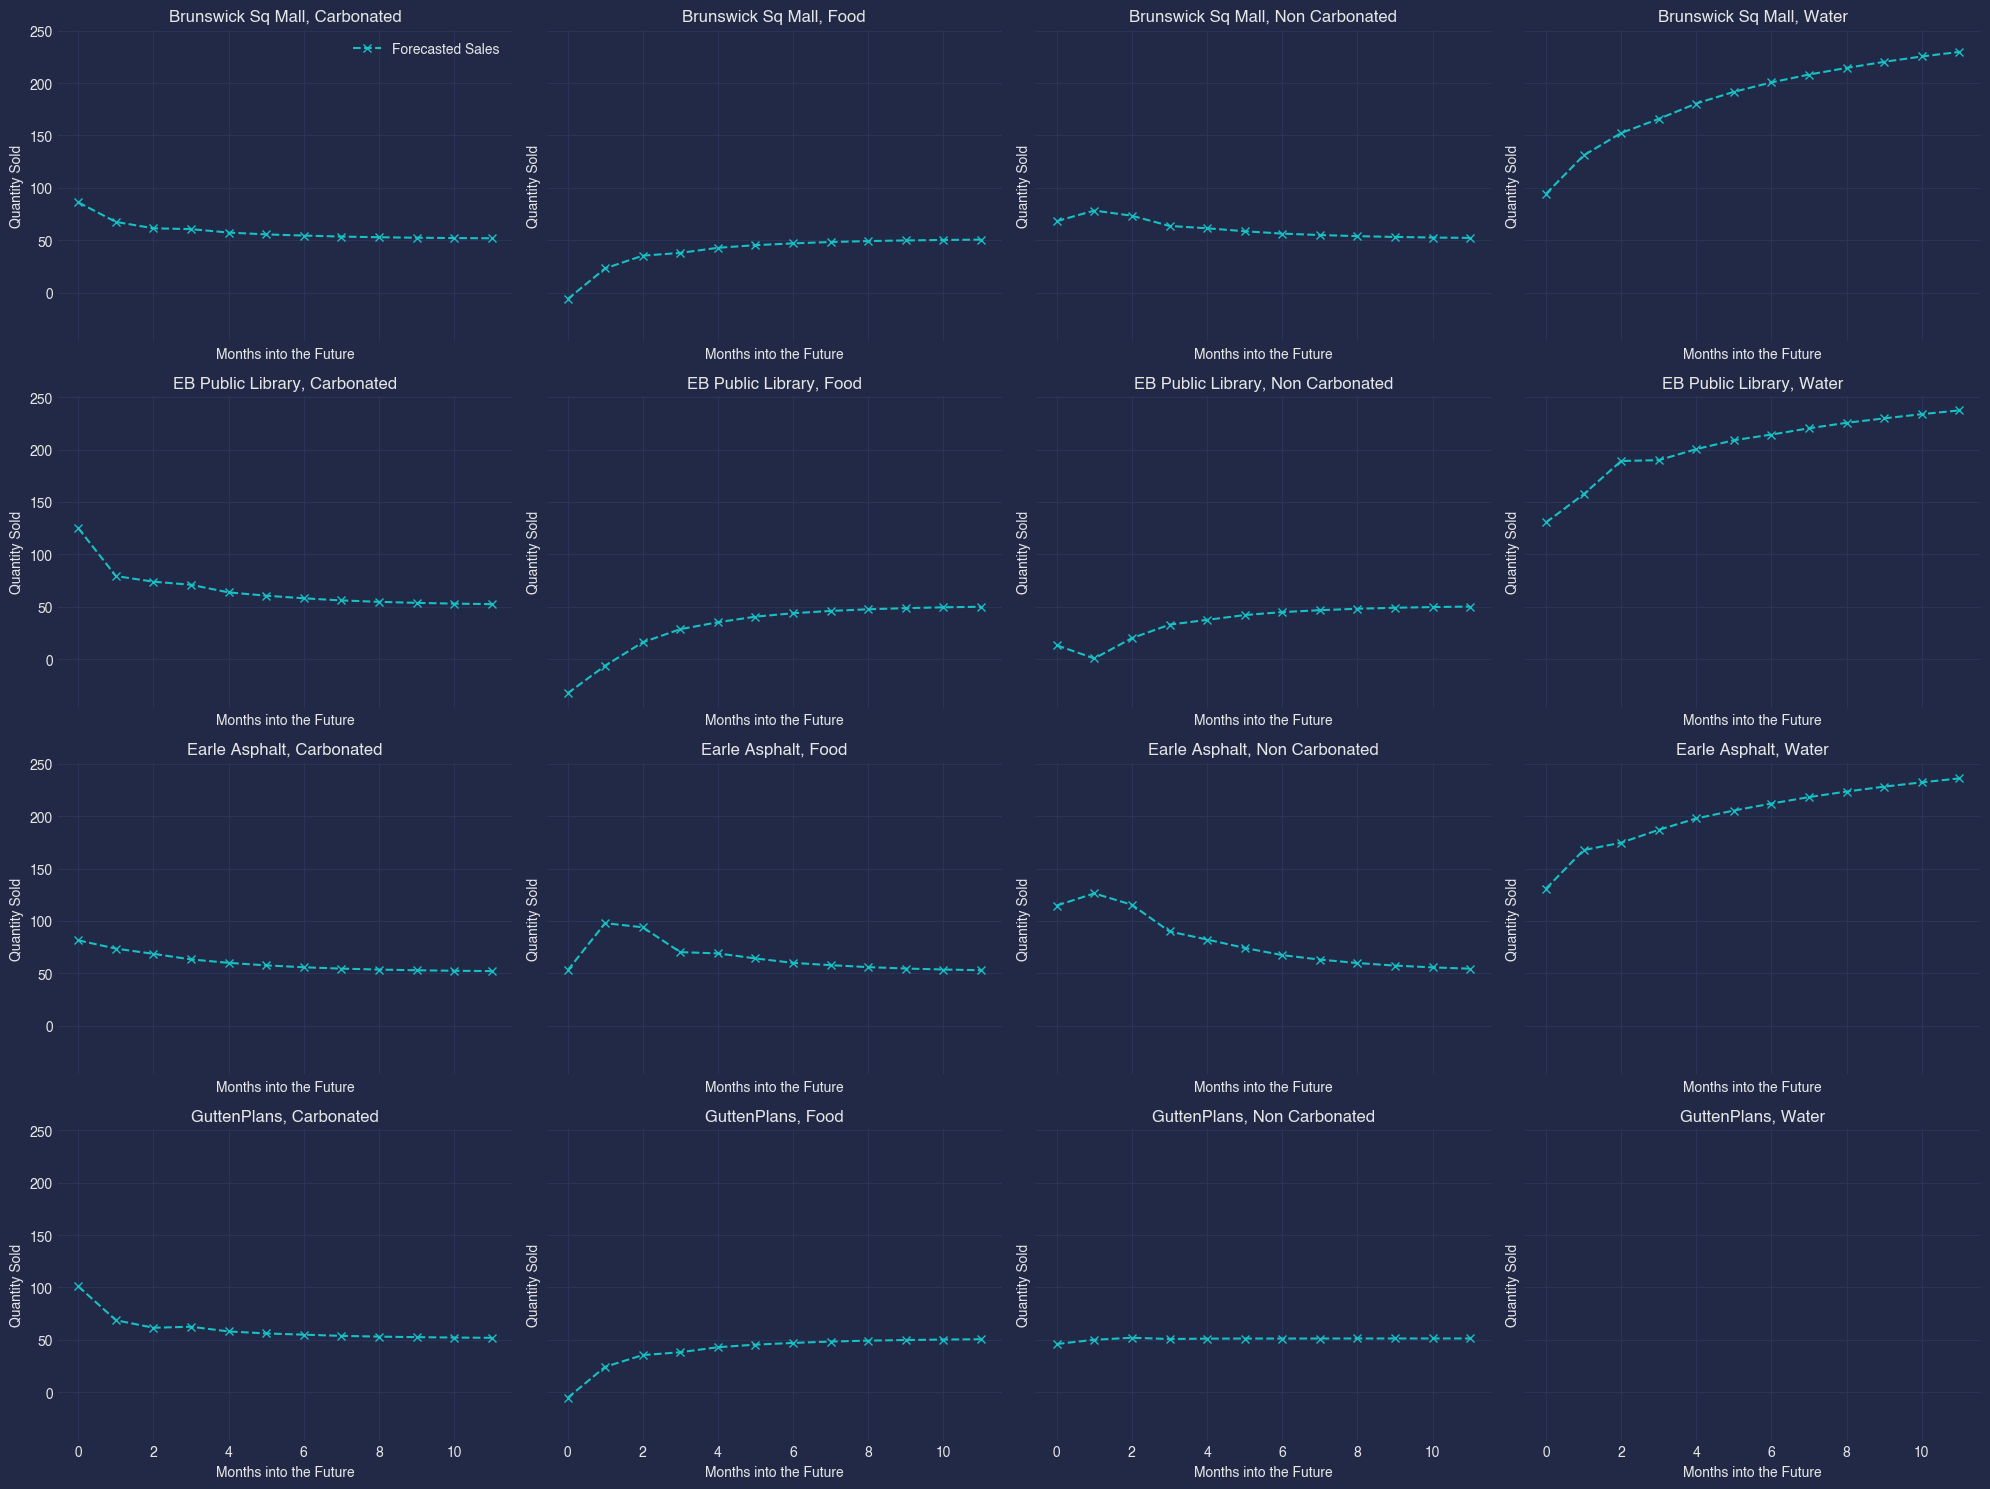

In [24]:
import matplotlib.pyplot as plt
import numpy as np

locations = df['Location'].unique()
categories = df['Category'].unique()

forecasted_data = {}
n_forecast_months = 12  # Number of months to forecast

def append_prediction_to_input(X_last, new_pred):
    new_seq = np.roll(X_last, -1, axis=1)
    new_seq[:, -1, :-1] = new_pred  # Append the new prediction while keeping the last feature set
    return new_seq

for location in locations:
    for category in categories:
        forecasted_data[(location, category)] = []
        # Ensure the columns are correctly formatted
        location_col = f'Location_{location}'
        category_col = f'Category_{category}'
        if location_col in df_processed.columns and category_col in df_processed.columns:
            df_filtered = df_processed[(df_processed[location_col] == 1) & (df_processed[category_col] == 1)]

            if not df_filtered.empty:
                features_filtered = df_filtered.drop(['TransDate', 'MQty'], axis=1).values
                target_filtered = df_filtered['MQty'].values

                X_filtered, y_filtered = create_sequences(np.hstack((features_filtered, target_filtered.reshape(-1, 1))), n_steps)

                if X_filtered.shape[0] > 0:
                    X_last = X_filtered[-1].reshape(1, n_steps, X_filtered.shape[2])

                    # Forecast for the next 12 months
                    for _ in range(n_forecast_months):
                        pred = model.predict(X_last)
                        forecasted_data[(location, category)].append(scaler.inverse_transform(pred)[0][0])
                        X_last = append_prediction_to_input(X_last, pred)

# Filter out empty forecasted data
filtered_forecasted_data = {k: v for k, v in forecasted_data.items() if not np.isnan(v).any() and isinstance(k[0], str) and isinstance(k[1], str)}

# Get unique locations and categories from filtered data
filtered_locations = sorted(set(k[0] for k in filtered_forecasted_data.keys() if isinstance(k[0], str)))
filtered_categories = sorted(set(k[1] for k in filtered_forecasted_data.keys() if isinstance(k[1], str)))

fig, axs = plt.subplots(len(filtered_locations), len(filtered_categories), figsize=(20, 15), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, location in enumerate(filtered_locations):
    for j, category in enumerate(filtered_categories):
        if (location, category) in filtered_forecasted_data:
            axs[i, j].plot(filtered_forecasted_data[(location, category)], label='Forecasted Sales', linestyle='--', marker='x')
            axs[i, j].set_title(f'{location}, {category}')
            axs[i, j].set_xlabel('Months into the Future')
            axs[i, j].set_ylabel('Quantity Sold')

            if i == 0 and j == 0:
                axs[i, j].legend()

plt.tight_layout()
plt.show()


#### Insight From Future Sales for Inventory Optimization 📅🔮

##### Key Insights:
- **Consistent Decline in Carbonated Drinks:** All locations show a decline in forecasted sales for carbonated drinks over the next 12 months. This suggests a potential shift in customer preferences. 🥤🔻
- **Steady Food Sales:** Food items maintain a steady sales forecast, indicating a consistent demand. 🍔📈
- **Non-Carbonated Drinks and Water:** These categories show stable or slightly increasing sales, reflecting a growing interest in healthier options. 💧📊

##### Fun Fact:
- **EB Public Library and GuttenPlans:** Both locations exhibit the highest variance in sales trends across different categories, indicating diverse customer preferences in these areas. 🌐✨

##### Recommendations:
1. **Adjust Inventory for Declining Trends:** Reduce stock for carbonated drinks and monitor customer preferences to adjust offerings accordingly. 📉🔄
2. **Ensure Sufficient Stock:** Maintain or slightly increase inventory for food and non-carbonated drinks to meet the steady demand. 📦🔼
3. **Promotional Campaigns:** Consider targeted promotions for healthier drink options to capitalize on the growing trend. 🎯🥤

## Calculating Inventory Metrics for Optimization 📦📊

This cell uses statistical methods to calculate key inventory metrics for each location and category in the vending machines. These metrics include:

- **Safety Stock**: Extra inventory to prevent stockouts due to demand variability and lead time fluctuations. 🛡️
- **Reorder Point**: The inventory level at which a new order should be placed to replenish stock before it runs out. 🔄
- **Economic Order Quantity (EOQ)**: The optimal order quantity that minimizes the total holding and ordering costs. 💰

The following parameters are used in the calculations:
- **Ordering Cost**: The cost to place an order (set at 100).
- **Holding Cost per Unit**: The cost to hold one unit of inventory for a year (set at 2).
- **Lead Time**: The lead time in months (set at 1).
- **Service Level**: The desired service level (set at 0.95).

By using these metrics, it's possible to optimize the inventory levels, ensuring efficient stock management and reducing costs. 📈✨

In [27]:
def calculate_safety_stock(demand_std, lead_time_std, service_level):
    if np.isnan(demand_std) or np.isnan(lead_time_std):
        return 0.00
    z_score = norm.ppf(service_level)
    safety_stock = z_score * np.sqrt((demand_std**2) + (lead_time_std**2))
    return safety_stock

def calculate_reorder_point(average_lead_time_demand, safety_stock):
    if np.isnan(average_lead_time_demand) or np.isnan(safety_stock):
        return 0.00
    reorder_point = average_lead_time_demand + safety_stock
    return reorder_point

def calculate_eoq(demand, ordering_cost, holding_cost):
    if demand == 0 or ordering_cost == 0 or holding_cost == 0:
        return 0.00
    eoq = np.sqrt((2 * demand * ordering_cost) / holding_cost)
    return eoq

results = []

# Calculate inventory metrics for each location and category
for location_category, forecasts in forecasted_data.items():
    # Example parameters
    ordering_cost = 100  # Cost to place an order
    holding_cost_per_unit = 2  # Cost to hold one unit of inventory for a year
    lead_time = 1  # Lead time in months
    service_level = 0.95  # Desired service level

    # Calculate demand variability and lead time demand
    demand_std = np.nan_to_num(np.std(forecasts))
    average_demand = np.nan_to_num(np.mean(forecasts))
    lead_time_demand = average_demand * lead_time

    # Calculate safety stock, reorder point, and EOQ
    safety_stock = calculate_safety_stock(demand_std, lead_time, service_level)
    reorder_point = calculate_reorder_point(lead_time_demand, safety_stock)
    eoq = calculate_eoq(sum(forecasts), ordering_cost, holding_cost_per_unit)

    # Ensuring results are not NaN and formatting output
    safety_stock_formatted = f"{safety_stock:0.2f}"
    reorder_point_formatted = f"{reorder_point:0.2f}"
    eoq_formatted = f"{eoq:0.2f}"

    if 'nan' not in str(location_category):  # Filter out 'nan' categories
        results.append([location_category, safety_stock_formatted, reorder_point_formatted, eoq_formatted])

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['Location & Category', 'Safety Stock', 'Reorder Point', 'EOQ'])


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divi

In [28]:
results_df

,Location & Category,Safety Stock,Reorder Point,EOQ
0,"(Brunswick Sq Mall, Carbonated)",15.56,74.31,265.50
1,"(Brunswick Sq Mall, Food)",26.09,65.45,217.33
2,"(Brunswick Sq Mall, Non Carbonated)",13.82,74.32,269.44
3,"(Brunswick Sq Mall, Water)",65.81,250.33,470.56
4,"(Earle Asphalt, Carbonated)",15.05,75.45,269.24
5,"(Earle Asphalt, Food)",24.54,89.70,279.63
6,"(Earle Asphalt, Non Carbonated)",40.75,120.73,309.80
7,"(Earle Asphalt, Water)",49.46,250.58,491.27
8,"(GuttenPlans, Carbonated)",21.71,82.18,269.38
9,"(GuttenPlans, Food)",25.62,65.23,218.00


#### Inventory Optimization Insights 📦🔍

##### Key Metrics for Each Location and Category:
- **Safety Stock:** Ensures there’s enough inventory to meet demand variability and avoid stockouts. 
  - Highest for **Brunswick Sq Mall, Water** (65.81 units) 💧🛡️.
  - Lowest for **GuttenPlans, Water** (1.64 units) 💧.

- **Reorder Point:** Indicates when to place a new order to replenish stock.
  - Highest for **EB Public Library, Water** (254.24 units) 📚🔄.
  - Lowest for **GuttenPlans, Water** (1.64 units) 💧.

- **EOQ (Economic Order Quantity):** Optimal order quantity minimizing total inventory costs.
  - Highest for **Earle Asphalt, Water** (491.27 units) 🚧.
  - Lowest for **GuttenPlans, Water** (0.00 units) 💧.

##### Fun Fact:
- **Water Demand:** Water has the highest safety stock and reorder points, reflecting its critical importance and consistent demand across locations. 💧✨

##### Recommendations:
1. **Monitor High Demand Items:** Focus on items like water at high-demand locations to avoid stockouts and ensure customer satisfaction. 🚰📈
2. **Optimize Ordering:** Use EOQ values to determine optimal order sizes, reducing holding and ordering costs efficiently. 📦🧮
3. **Adjust for Variability:** Regularly update safety stock levels based on demand variability to maintain service levels. 🔄🔍

### Visual Overview:
The table provides a comprehensive view of safety stock, reorder points, and EOQ for each location and category, aiding in strategic inventory management. 📊✨

# Conclusion 🎉
### Key Insights ✨

- **High-Demand Locations and Categories**:
  - Locations like Brunswick Sq Mall and EB Public Library showed significant demand for both carbonated and non-carbonated drinks.
  - Food items consistently displayed high sales across all locations.

- **Inventory Optimization**:
  - Implementing safety stock and reorder points helps in maintaining optimal inventory levels, preventing stockouts and overstock situations.
  - Using EOQ ensures cost-efficient ordering practices, balancing the holding and ordering costs effectively.

- **Future Sales Predictions**:
  - The LSTM model forecasts highlighted potential high-demand periods, enabling proactive inventory planning.
  - Notable trends include steady demand for water and food items, while some carbonated drinks show declining trends.

### Recommendations 📋

1. **Monitor Inventory Levels Regularly**:
   - Keep a close watch on inventory levels, especially for high-demand items, and adjust safety stock and reorder points as necessary.

2. **Utilize Forecasting for Inventory Planning**:
   - Use the sales forecasts to plan inventory levels, ensuring that popular items are well-stocked during high-demand periods.

3. **Optimize Order Quantities**:
   - Implement the calculated EOQ to streamline ordering processes and reduce overall inventory costs.

### Final Thoughts 🌟

By leveraging the insights and metrics derived from this analysis, vending machine operators can enhance their inventory management practices, ensuring that machines are always stocked with the right products at the right time. This not only boosts customer satisfaction but also optimizes operational efficiency and cost-effectiveness.

Happy Vending! 🥤🍫🚀
